<a href="https://colab.research.google.com/github/DamodaraBarbosa/linear_regression_studies/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sns.set()

# Carregando os dados em um *dataframe*

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/Attrition Data.csv')
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
f'O dataset possui {data.shape[0]} linhas em {data.shape[1]} colunas.'

'O dataset possui 1470 linhas em 13 colunas.'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


## Descrição dos dados

Retirada da página do *dataset* no *Kaggle*: https://www.kaggle.com/datasets/prachi13/employeeattritionrate

The dataset consists of 14710 observations and 8 variables. Each row in dataset represents an employee; each column contains employee attributes:

Independent Variables were:
Age: Age of employees,

Department: Department of work,

Distance from home,

Education: 1-Below College; 2-College; 3-Bachelor; 4-Master; 5-Doctor;

Education Field

Environment Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

Job Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;

Marital Status,

Monthly Income,

Num Companies Worked: Number of companies worked prior to IBM,

Work Life Balance: 1-Bad; 2-Good; 3-Better; 4-Best;

Years At Company: Current years of service in IBM

Dependent Variable was:

Attrition: Employee attrition status(0 or 1)

# Análise exploratória

## Coluna `Age`

In [6]:
age = data['Age']

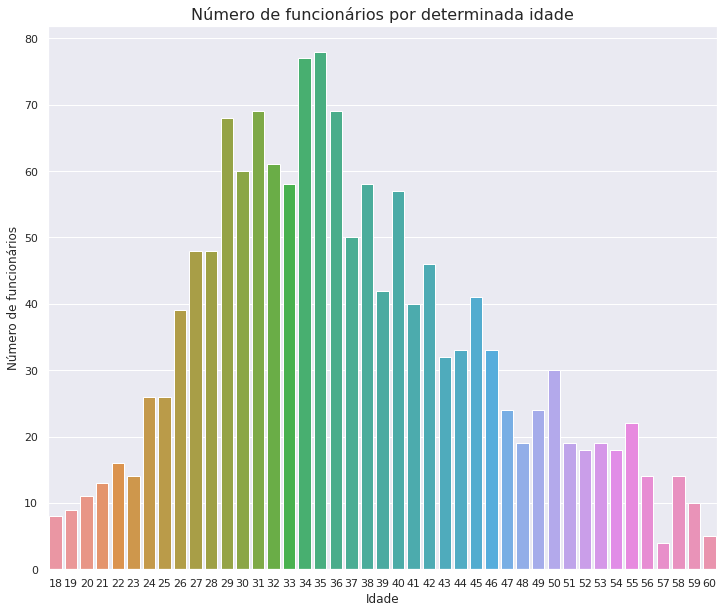

In [7]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'Age')
plt.title('Número de funcionários por determinada idade', fontsize= 16)
plt.xlabel('Idade')
plt.ylabel('Número de funcionários')
plt.show()

In [8]:
bins = [17, 30, 40, 50, 60]
labels = ['Entre 18 e 30', 'Entre 31 e 40', 'Entre 41 e 50', 'Entre 51 e 60']

In [9]:
age_cut = pd.cut(age, bins= bins, labels= labels).value_counts().sort_index()

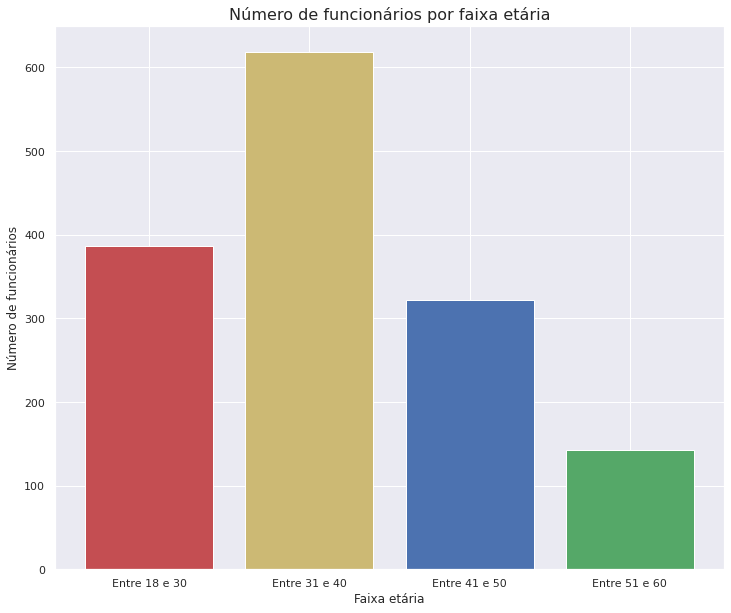

In [10]:
plt.figure(figsize= (12, 10))
bars = plt.bar(age_cut.keys(), age_cut.values, color= ['r', 'y', 'b', 'g'])
plt.title('Número de funcionários por faixa etária', fontsize= 16)
plt.xlabel('Faixa etária')
plt.ylabel('Número de funcionários')
plt.show()

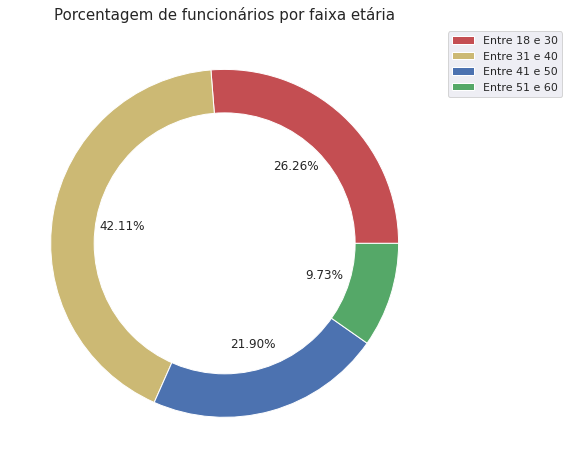

In [11]:
plt.figure(figsize= (10, 8))
plt.pie(age_cut, autopct= '%.2f%%', colors= ['r', 'y', 'b', 'g'])
plt.legend(age_cut.keys(), bbox_to_anchor= (1, 1))
plt.title('Porcentagem de funcionários por faixa etária', fontsize= 15)
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* Média, mediana e moda da idade dos funcionários:

In [12]:
age = data['Age']

In [13]:
pd.DataFrame({'Média': age.mean().round(2), 'Mediana': age.median(), 'Moda': age.mode()[0]}, index= [0])

,Média,Mediana,Moda
0,36.92,36.0,35


* Desvio médio, variância e desvio padrão:

In [14]:
pd.DataFrame({'Desvio médio': age.mad().round(2), 
              'Variância': age.var().round(2),
              'Desvio padrão': age.std().round(2)}, 
              index= [0])

,Desvio médio,Variância,Desvio padrão
0,7.41,83.46,9.14


* Distribuição de frequência da variável `Age`

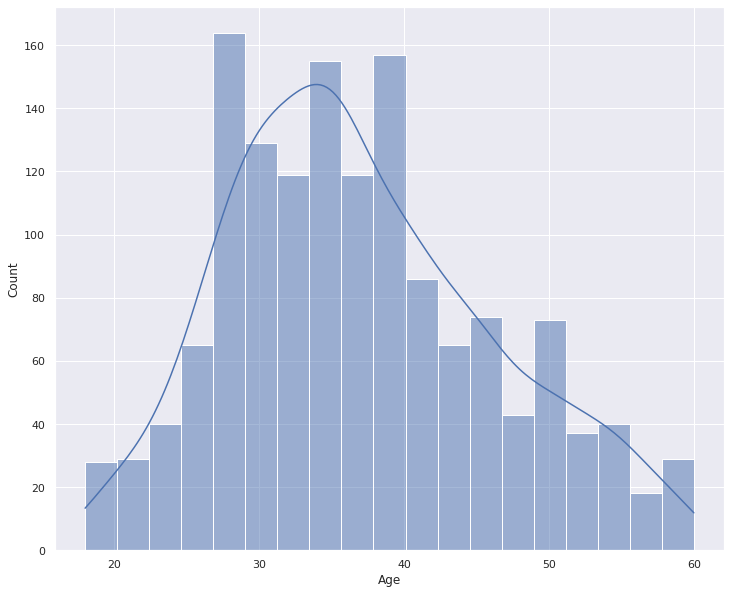

In [15]:
plt.figure(figsize= (12, 10))
sns.histplot(data= data, x= 'Age', kde= True)
plt.show()

## Coluna `Departament`

Referente ao departamento em que o funcionário trabalha na empresa.

In [16]:
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

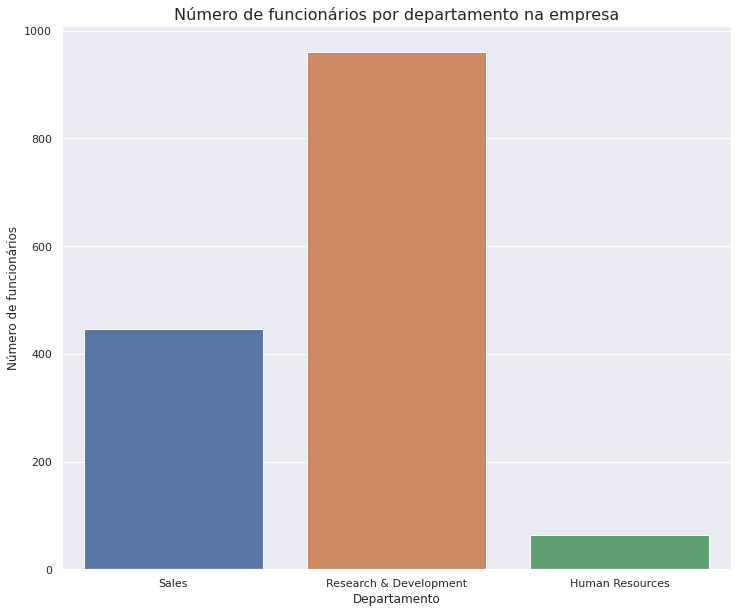

In [17]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'Department')
plt.title('Número de funcionários por departamento na empresa', fontsize= 16)
plt.xlabel('Departamento')
plt.ylabel('Número de funcionários')
plt.show()

In [18]:
department = data['Department'] # variável department armazena a series department

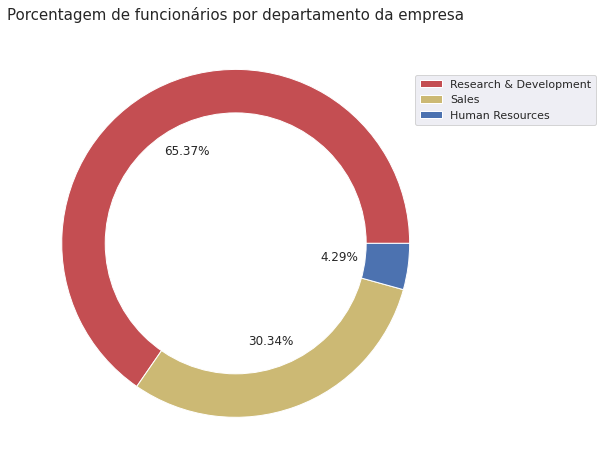

In [19]:
plt.figure(figsize= (10, 8))
plt.pie(department.value_counts(), autopct= '%.2f%%', colors= ['r', 'y', 'b', 'g'])
plt.title('Porcentagem de funcionários por departamento da empresa', fontsize= 15)
plt.legend(department.value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Coluna `DistanceFromHome`

Variável referente a distância do trabalho até a casa do empregado. Não fica claro, mas assumo que seja em quilômetros.

In [20]:
distance_home = data['DistanceFromHome']

* Média, mediana e moda:

In [21]:
pd.DataFrame({'Média': distance_home.mean().round(), 
              'Mediana': distance_home.median(),
              'Moda': distance_home.mode()[0]},
             index= [0])

,Média,Mediana,Moda
0,9.0,7.0,2


* Desvio médio, variância e desvio padrão:

In [22]:
pd.DataFrame({'Desvio médio': distance_home.mad().round(2),
              'Variância': distance_home.var().round(2),
              'Desvio padrão': distance_home.std().round(2)},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,6.57,65.72,8.11


* Distribuição de frequência da variável:

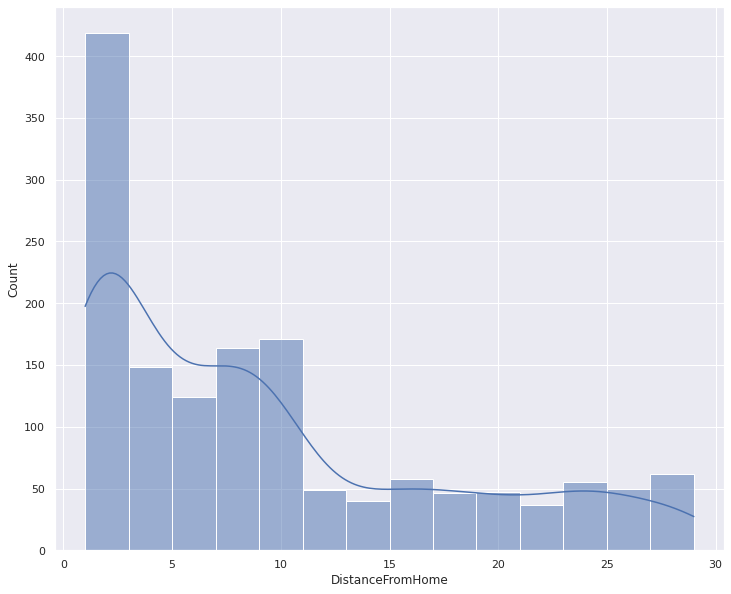

In [23]:
plt.figure(figsize= (12, 10))
sns.histplot(data= data, x= 'DistanceFromHome', kde= True)
plt.show()

## Coluna `Education`

Referente ao grau de escolaridade do funcionário.

In [24]:
education = data['Education']

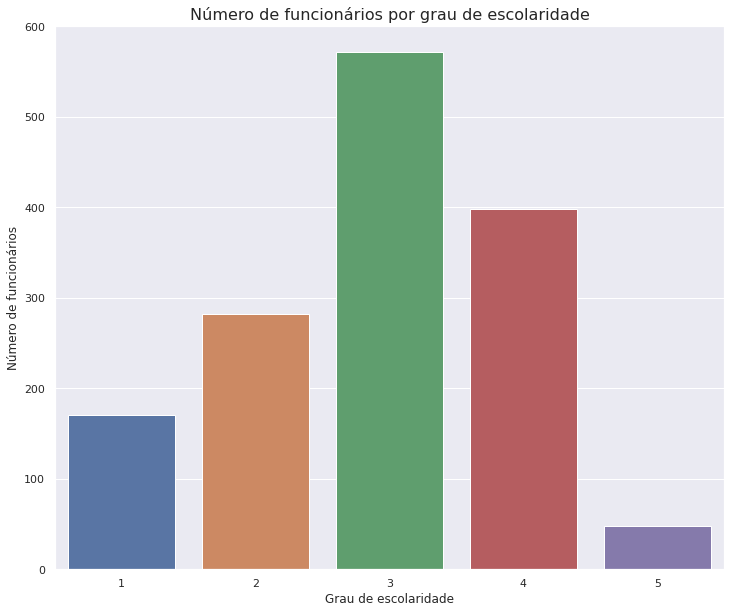

In [25]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'Education')
plt.title('Número de funcionários por grau de escolaridade', fontsize= 16)
plt.xlabel('Grau de escolaridade')
plt.ylabel('Número de funcionários')
plt.show()

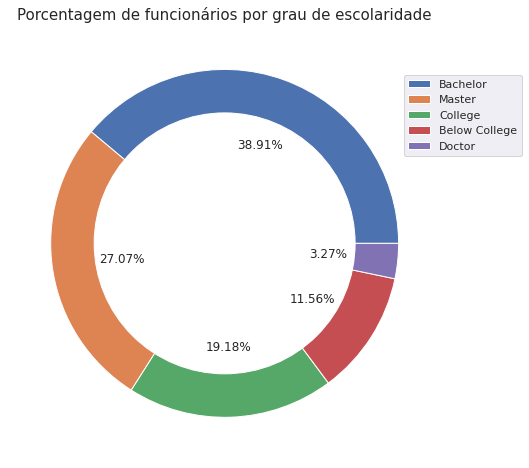

In [26]:
plt.figure(figsize= (10, 8))
plt.pie(education.value_counts(), autopct= '%.2f%%')
plt.title('Porcentagem de funcionários por grau de escolaridade', fontsize= 15)
plt.legend(education.map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}).value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Coluna `EducationField`

Assumo que seja o campo educacional em que o empregado tenha se dedicado.

In [27]:
education_field = data['EducationField']

In [28]:
education_field.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

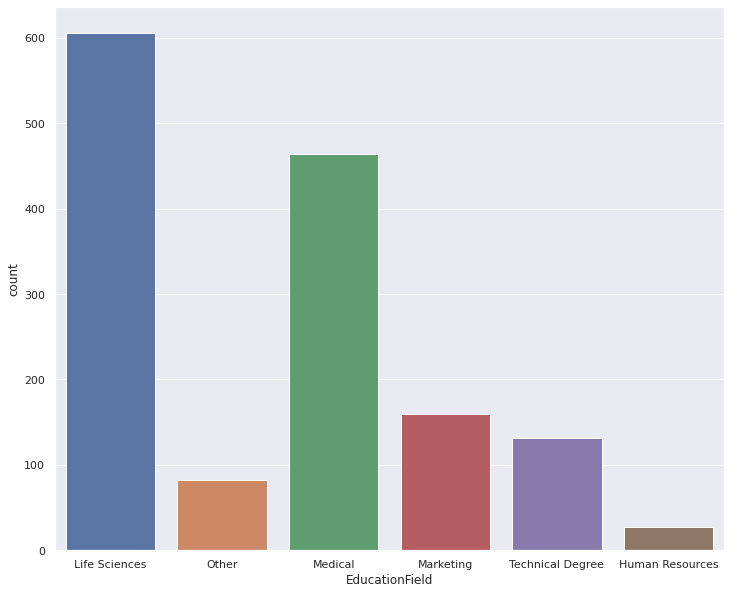

In [29]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'EducationField')
plt.show()

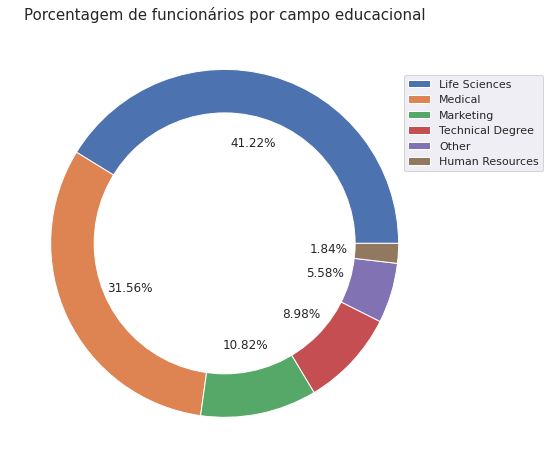

In [30]:
plt.figure(figsize= (10, 8))
plt.pie(education_field.value_counts(), autopct= '%.2f%%')
plt.title('Porcentagem de funcionários por campo educacional', fontsize= 15)
plt.legend(education_field.value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Coluna `EnvironmentSatisfaction`

In [31]:
enviroment = data['EnvironmentSatisfaction']

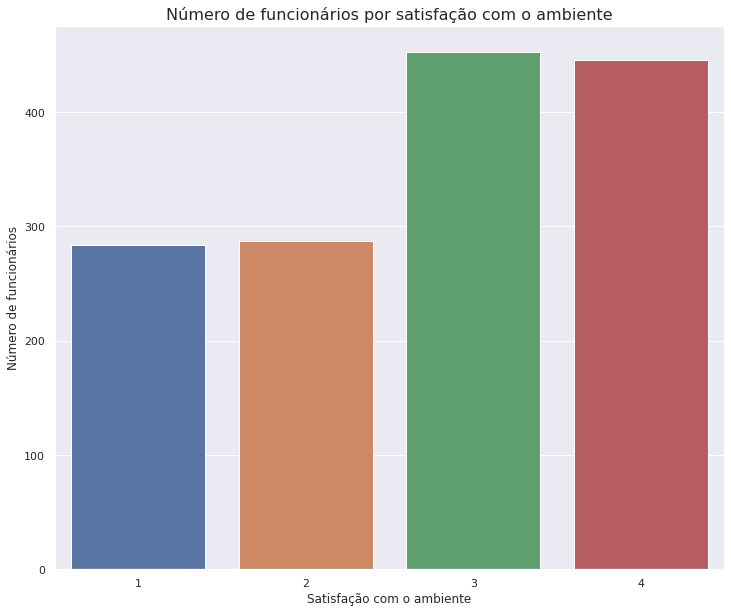

In [32]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'EnvironmentSatisfaction')
plt.title('Número de funcionários por satisfação com o ambiente', fontsize= 16)
plt.xlabel('Satisfação com o ambiente')
plt.ylabel('Número de funcionários')
plt.show()

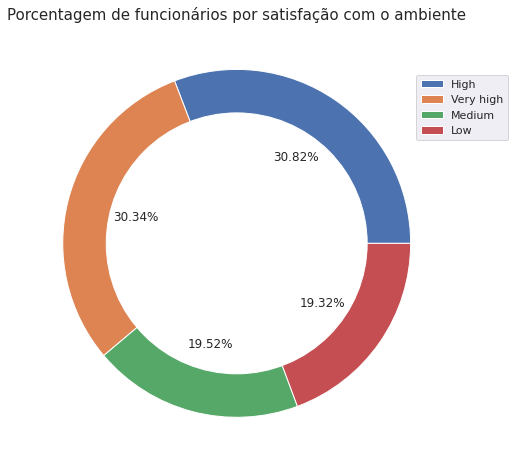

In [33]:
plt.figure(figsize= (10, 8))
plt.pie(enviroment.value_counts(), autopct= '%.2f%%')
plt.title('Porcentagem de funcionários por satisfação com o ambiente', fontsize= 15)
plt.legend(enviroment.map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very high'}).value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Coluna `JobSatisfaction`

Referente à satisfação com o trabalho.

In [34]:
job = data['JobSatisfaction']

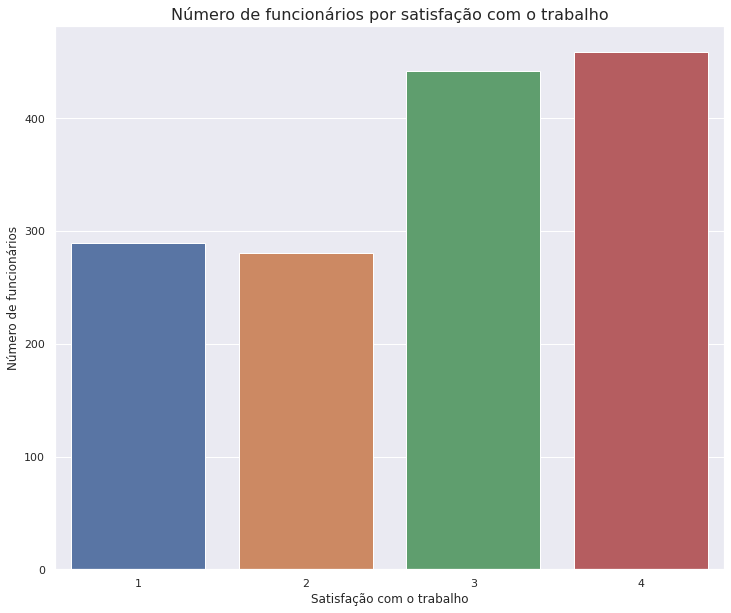

In [35]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'JobSatisfaction')
plt.title('Número de funcionários por satisfação com o trabalho', fontsize= 16)
plt.xlabel('Satisfação com o trabalho')
plt.ylabel('Número de funcionários')
plt.show()

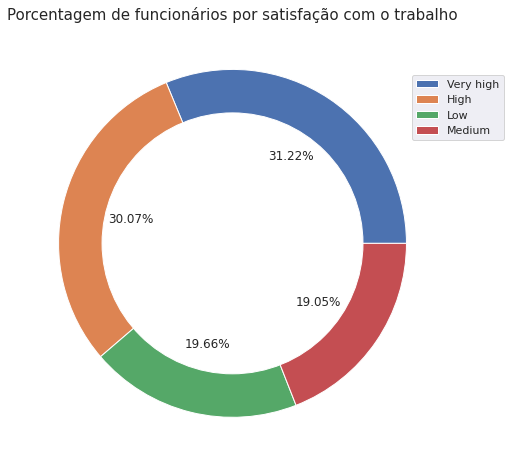

In [36]:
plt.figure(figsize= (10, 8))
plt.pie(job.value_counts(), autopct= '%.2f%%')
plt.title('Porcentagem de funcionários por satisfação com o trabalho', fontsize= 15)
plt.legend(job.map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very high'}).value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Coluna `MaritalStatus`

Referente ao estado civil do empregado.

In [37]:
marital = data['MaritalStatus']

In [38]:
marital.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

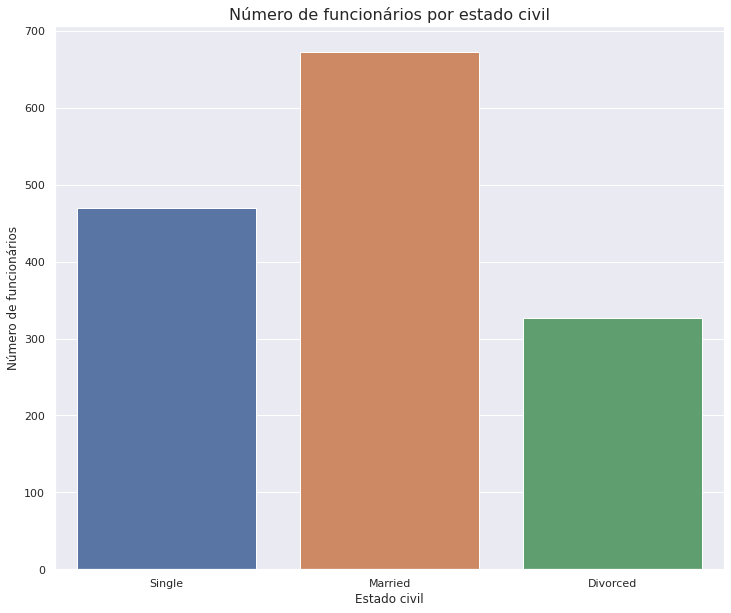

In [39]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'MaritalStatus')
plt.title('Número de funcionários por estado civil', fontsize= 16)
plt.xlabel('Estado civil')
plt.ylabel('Número de funcionários')
plt.show()

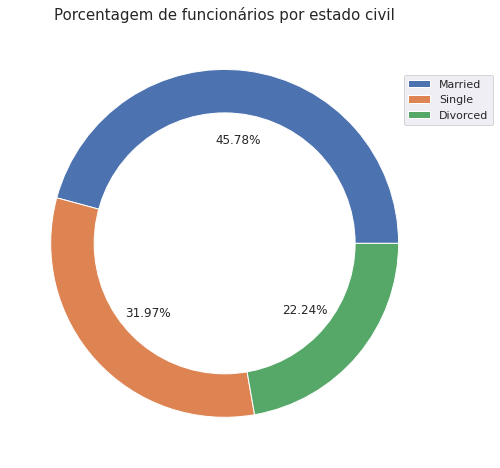

In [40]:
plt.figure(figsize= (10, 8))
plt.pie(marital.value_counts(), autopct= '%.2f%%')
plt.title('Porcentagem de funcionários por estado civil', fontsize= 15)
plt.legend(marital.value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Coluna `MonthlyIncome`

In [41]:
income = data['MonthlyIncome']

* Média, mediana e moda:

In [42]:
pd.DataFrame({'Média': income.mean().round(2),
              'Mediana': income.median().round(2),
              'Moda': income.mode()[0]},
             index= [0])

,Média,Mediana,Moda
0,6502.93,4919.0,2342


* Desvio médio, variância e desvio padrão:

In [43]:
pd.DataFrame({'Desvio médio': income.mad().round(2),
              'Variância': income.var().round(2),
              'Desvio padrão': income.std().round(2)},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,3631.45,22164857.07,4707.96


* Distribuição de frequência:

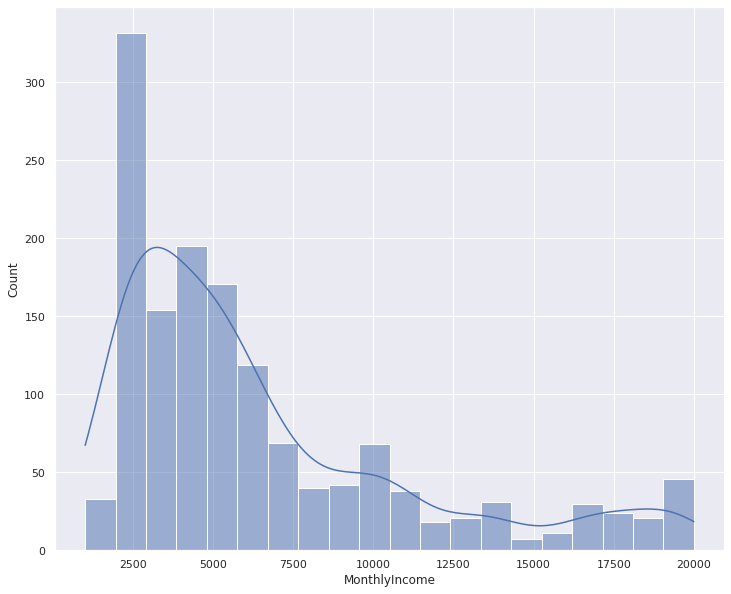

In [44]:
plt.figure(figsize= (12, 10))
sns.histplot(data= data, x= 'MonthlyIncome', kde= True)
plt.show()

### Variável de renda em relação à outras variáveis

* Quem ganha melhor, solteiro, casado ou divorciado?

In [45]:
pd.DataFrame(data.groupby('MaritalStatus')['MonthlyIncome'].mean().round(2))

,MonthlyIncome
MaritalStatus,
Divorced,6786.29
Married,6793.67
Single,5889.47


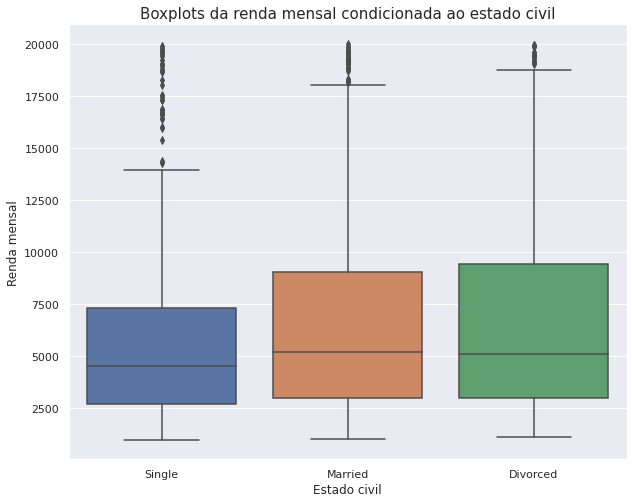

In [46]:
plt.figure(figsize= (10, 8))
sns.boxplot(data= data, x= 'MaritalStatus', y= 'MonthlyIncome')
plt.title('Boxplots da renda mensal condicionada ao estado civil', fontsize= 15)
plt.xlabel('Estado civil')
plt.ylabel('Renda mensal')
plt.show()

* Qual departamento tem melhor renda?

In [47]:
pd.DataFrame(data.groupby('Department')['MonthlyIncome'].mean().round(2))

,MonthlyIncome
Department,
Human Resources,6654.51
Research & Development,6281.25
Sales,6959.17


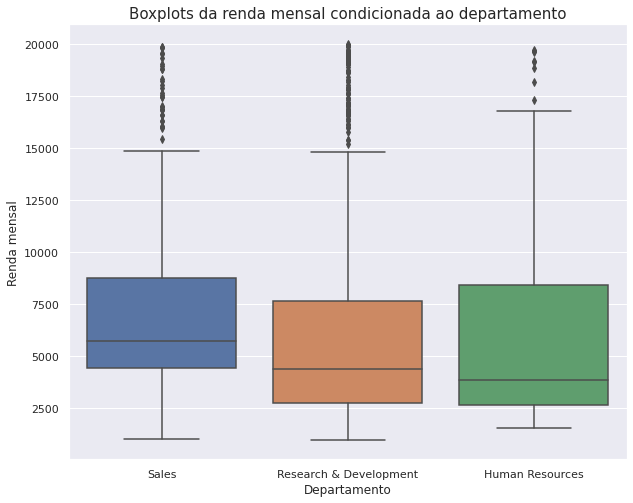

In [48]:
plt.figure(figsize= (10, 8))
sns.boxplot(data= data, x= 'Department', y= 'MonthlyIncome')
plt.title('Boxplots da renda mensal condicionada ao departamento', fontsize= 15)
plt.xlabel('Departamento')
plt.ylabel('Renda mensal')
plt.show()

* Como o campo educacional influencia na renda?

In [49]:
pd.DataFrame(data.groupby('EducationField')['MonthlyIncome'].mean().round(2))

,MonthlyIncome
EducationField,
Human Resources,7241.15
Life Sciences,6463.29
Marketing,7348.58
Medical,6510.04
Other,6071.55
Technical Degree,5758.30


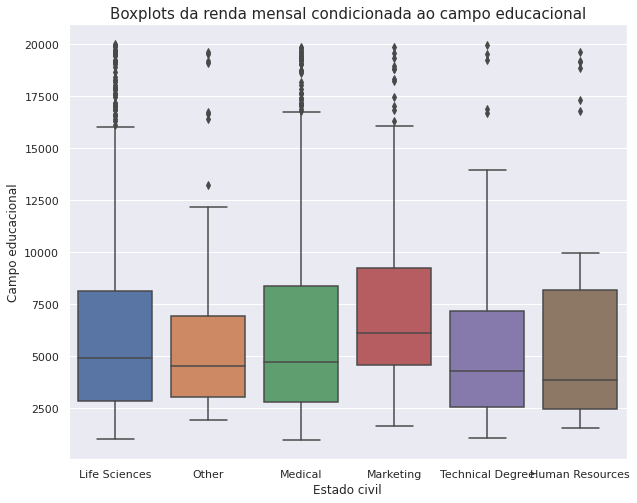

In [50]:
plt.figure(figsize= (10, 8))
sns.boxplot(data= data, x= 'EducationField', y= 'MonthlyIncome')
plt.title('Boxplots da renda mensal condicionada ao campo educacional', fontsize= 15)
plt.xlabel('Estado civil')
plt.ylabel('Campo educacional')
plt.show()

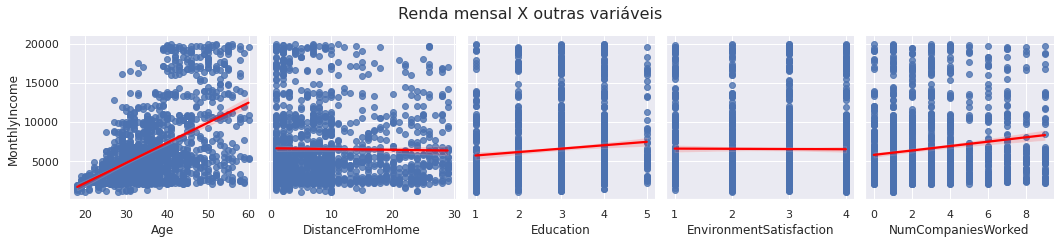

In [51]:
ax = sns.pairplot(data= data, x_vars= ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'NumCompaniesWorked'], 
             y_vars= 'MonthlyIncome', height= 3, kind= 'reg', plot_kws= {'line_kws': {'color': 'red'}})
ax.fig.suptitle('Renda mensal X outras variáveis', fontsize= 16, y= 1.1)
plt.show()

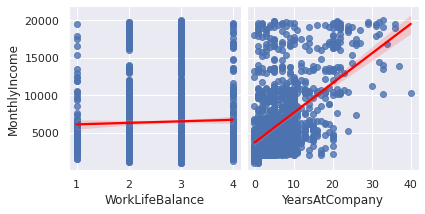

In [52]:
sns.pairplot(data= data, x_vars= ['WorkLifeBalance', 'YearsAtCompany'], 
             y_vars= 'MonthlyIncome', height= 3, kind= 'reg', plot_kws= {'line_kws': {'color': 'red'}})
plt.show()

## Coluna `NumCompaniesWorked`

Referente ao número de empresas que o funcionário trabalhou anteriormente.

In [53]:
companies = data['NumCompaniesWorked']

* Média, mediana e moda:

In [54]:
pd.DataFrame({'Média': companies.mean().round(2),
              'Mediana': companies.median(),
              'Moda': companies.mode()[0]},
             index= [0])

,Média,Mediana,Moda
0,2.69,2.0,1


* Desvio médio, variância e desvio padrão:

In [55]:
pd.DataFrame({'Desvio médio': companies.mad().round(2),
              'Variância': companies.var().round(2),
              'Desvio padrão': companies.std().round(2)},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,2.06,6.24,2.5


* Distribuição de frequência:

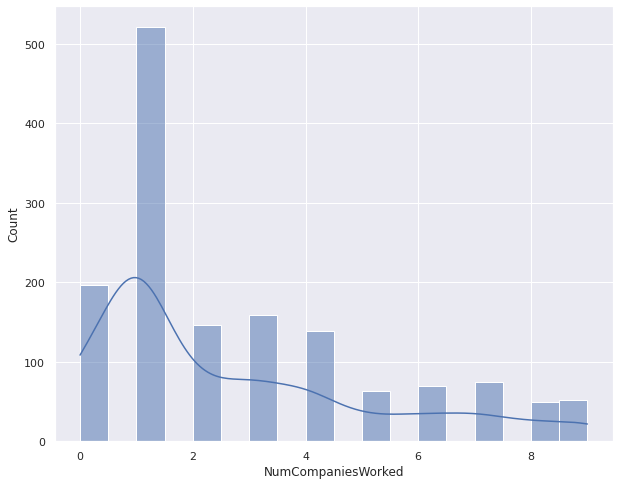

In [56]:
plt.figure(figsize= (10, 8))
sns.histplot(data= data, x= 'NumCompaniesWorked', kde= True)
plt.show()

* Quem possui mais experiência em outras empresas tem melhor renda mensal?

In [57]:
pd.DataFrame(data.groupby('NumCompaniesWorked')['MonthlyIncome'].mean().round(2))

,MonthlyIncome
NumCompaniesWorked,
0,5805.24
1,5259.96
2,7688.68
3,8270.55
4,7206.55
5,6984.27
6,7104.39
7,7812.08
8,6628.04


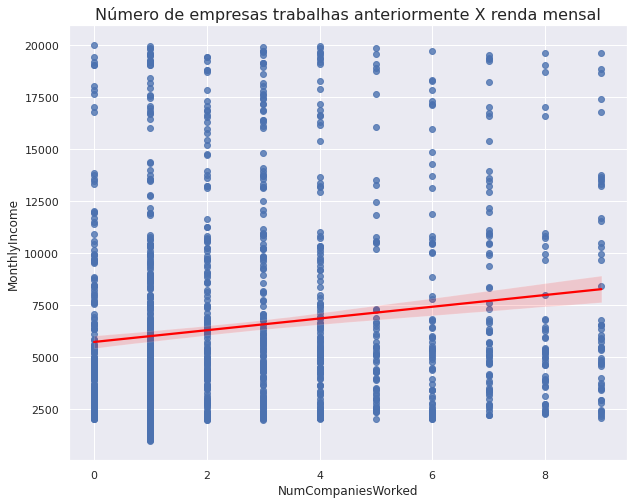

In [58]:
plt.figure(figsize= (10, 8))
sns.regplot(data= data, x= 'NumCompaniesWorked', y= 'MonthlyIncome', line_kws= {'color': 'red'})
plt.title('Número de empresas trabalhas anteriormente X renda mensal', fontsize= 16)
plt.show()

## Coluna `WorkLifeBalance`

In [59]:
balance = data['WorkLifeBalance']

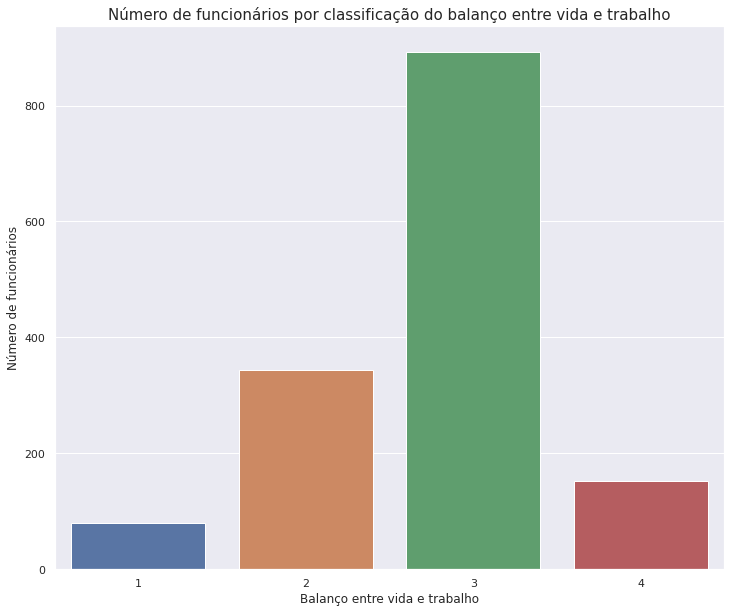

In [60]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'WorkLifeBalance')
plt.title('Número de funcionários por classificação do balanço entre vida e trabalho', fontsize= 15)
plt.xlabel('Balanço entre vida e trabalho')
plt.ylabel('Número de funcionários')
plt.show()

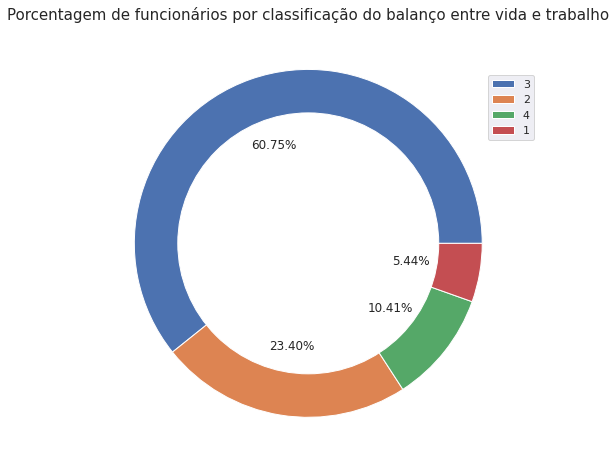

In [61]:
plt.figure(figsize= (10, 8))
plt.pie(balance.value_counts(), autopct= '%.2f%%')
plt.title('Porcentagem de funcionários por classificação do balanço entre vida e trabalho', fontsize= 15)
plt.legend(balance.value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Coluna `YearsAtCompany`

In [62]:
company = data['YearsAtCompany']

* Média, mediana e moda:

In [63]:
pd.DataFrame({'Média': company.mean().round(2),
              'Mediana': company.median(),
              'Moda': company.mode()[0]},
             index= [0])

,Média,Mediana,Moda
0,7.01,5.0,5


* Desvio médio, variância e mediana:

In [64]:
pd.DataFrame({'Desvio médio': company.mad().round(2),
              'Variância': company.var().round(2),
              'Desvio padrão': company.std().round(2)},
             index= [0])

,Desvio médio,Variância,Desvio padrão
0,4.47,37.53,6.13


* Distribuição de frequência:

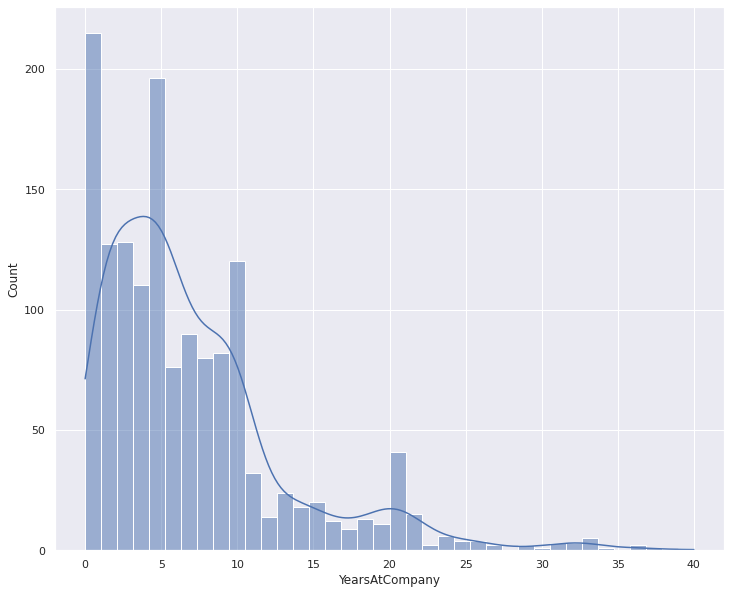

In [65]:
plt.figure(figsize= (12, 10))
sns.histplot(data= data, x= 'YearsAtCompany', kde= True)
plt.show()

## Coluna `Attrition` - variável dependente

É a variável alvo da análise e modelo preditivo, indica o *status* de desgaste do empregado da empresa.

In [66]:
attrition = data['Attrition']

In [67]:
attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

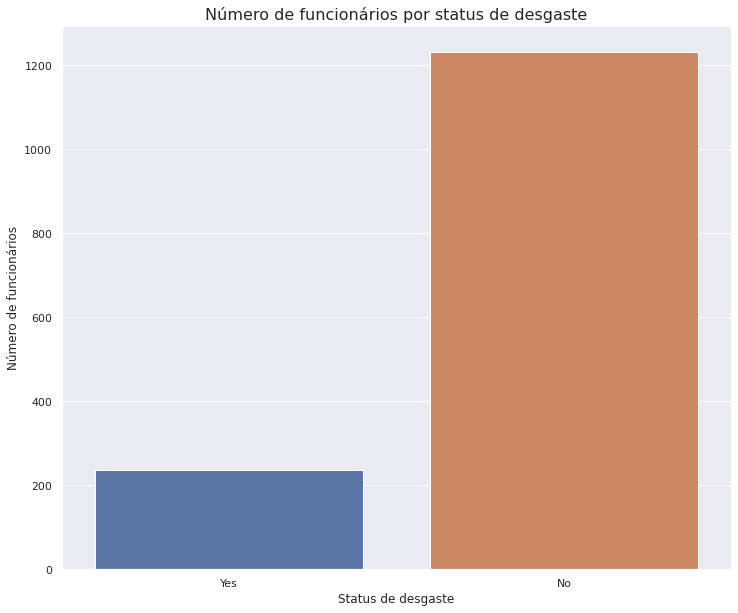

In [68]:
plt.figure(figsize= (12, 10))
sns.countplot(data= data, x= 'Attrition')
plt.title('Número de funcionários por status de desgaste', fontsize= 16)
plt.xlabel('Status de desgaste')
plt.ylabel('Número de funcionários')
plt.show()

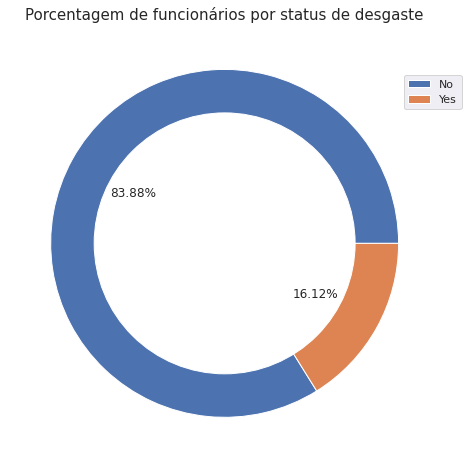

In [69]:
plt.figure(figsize= (10, 8))
plt.pie(attrition.value_counts(), autopct= '%.2f%%')
plt.legend(attrition.value_counts().keys(), bbox_to_anchor= (0.9, 0.9))
plt.title('Porcentagem de funcionários por status de desgaste', fontsize= 15)
my_circle = plt.Circle((0, 0), 0.75, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* Como o desgaste influencia na renda ou vice-versa:

In [70]:
pd.DataFrame(data.groupby('Attrition')['MonthlyIncome'].mean().round(2))

,MonthlyIncome
Attrition,
No,6832.74
Yes,4787.09


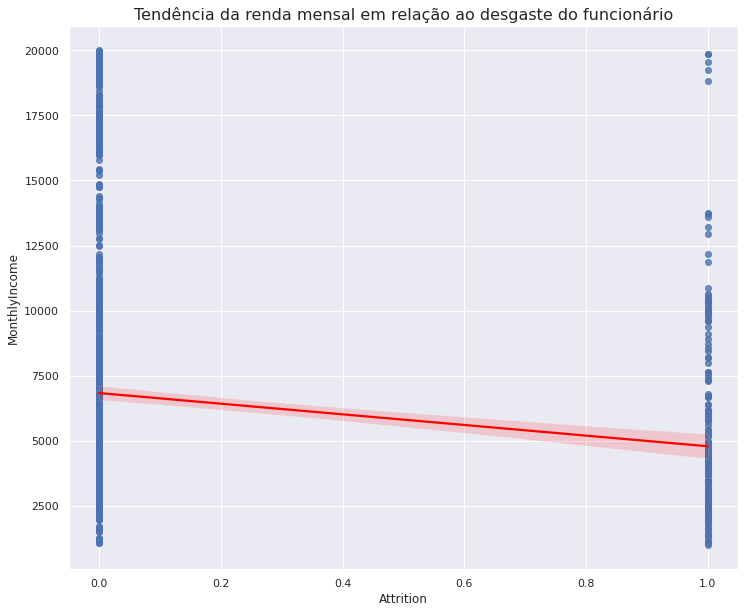

In [71]:
plt.figure(figsize= (12, 10))
sns.regplot(data= data, x= data['Attrition'].map({'No': 0, 'Yes': 1}), y= 'MonthlyIncome', line_kws= {'color': 'red'})
plt.title('Tendência da renda mensal em relação ao desgaste do funcionário', fontsize= 16)
plt.show()

Os funcionário que apresentam algum desgaste na empresa apresentam menores salários.

# Tratamentos dos dados

## Transformando os dados da variável dependente para dados numéricos

In [72]:
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

A variável de interesse é a variável `Attrition`, que possui dois valores únicos: no ou yes. Aqui é feito um tratamento para substituir **NÃO** por 0 e **SIM** por 1.

In [73]:
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})

In [74]:
data['Attrition'].unique()

array([1, 0])

In [75]:
data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

# Estatísticas descritivas

In [76]:
data.describe().round(2)

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,0.16,9.19,2.91,2.72,2.73,6502.93,2.69,2.76,7.01
std,9.14,0.37,8.11,1.02,1.09,1.10,4707.96,2.50,0.71,6.13
min,18.00,0.00,1.00,1.00,1.00,1.00,1009.00,0.00,1.00,0.00
25%,30.00,0.00,2.00,2.00,2.00,2.00,2911.00,1.00,2.00,3.00
50%,36.00,0.00,7.00,3.00,3.00,3.00,4919.00,2.00,3.00,5.00
75%,43.00,0.00,14.00,4.00,4.00,4.00,8379.00,4.00,3.00,9.00
max,60.00,1.00,29.00,5.00,4.00,4.00,19999.00,9.00,4.00,40.00


# Análise de correlação

In [77]:
data.corr().round(2)

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.00,-0.16,-0.00,0.21,0.01,-0.00,0.50,0.30,-0.02,0.31
Attrition,-0.16,1.00,0.08,-0.03,-0.10,-0.10,-0.16,0.04,-0.06,-0.13
DistanceFromHome,-0.00,0.08,1.00,0.02,-0.02,-0.00,-0.02,-0.03,-0.03,0.01
Education,0.21,-0.03,0.02,1.00,-0.03,-0.01,0.09,0.13,0.01,0.07
EnvironmentSatisfaction,0.01,-0.10,-0.02,-0.03,1.00,-0.01,-0.01,0.01,0.03,0.00
JobSatisfaction,-0.00,-0.10,-0.00,-0.01,-0.01,1.00,-0.01,-0.06,-0.02,-0.00
MonthlyIncome,0.50,-0.16,-0.02,0.09,-0.01,-0.01,1.00,0.15,0.03,0.51
NumCompaniesWorked,0.30,0.04,-0.03,0.13,0.01,-0.06,0.15,1.00,-0.01,-0.12
WorkLifeBalance,-0.02,-0.06,-0.03,0.01,0.03,-0.02,0.03,-0.01,1.00,0.01
YearsAtCompany,0.31,-0.13,0.01,0.07,0.00,-0.00,0.51,-0.12,0.01,1.00


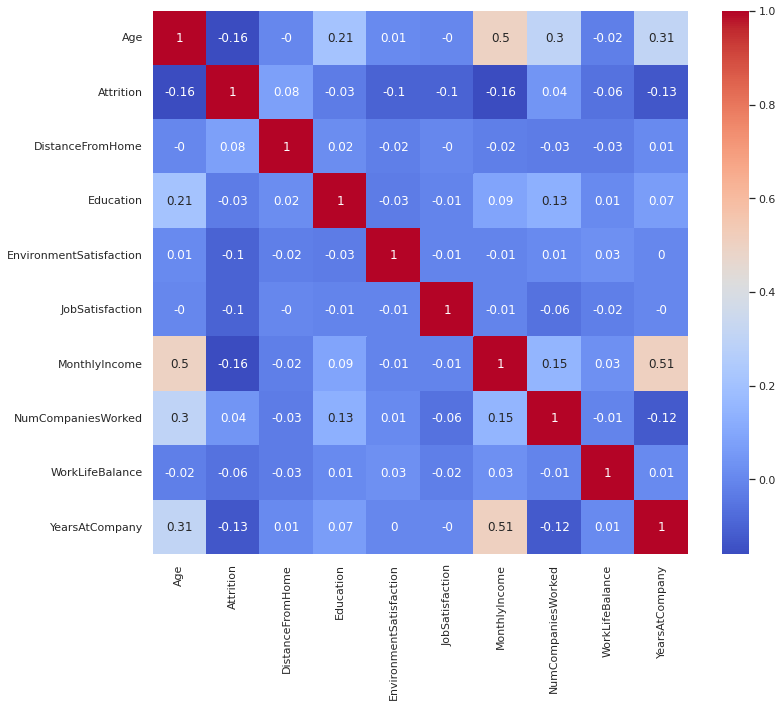

In [78]:
plt.figure(figsize= (12, 10))
sns.heatmap(data.corr().round(2), annot= True, cmap= 'coolwarm')
plt.show()

# Modelo preditivo

## Variáveis independentes e variável dependente

In [79]:
X = data.drop('Attrition', axis= 1) # X contém todas as colunas exceto a coluna Attrition
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [80]:
y = data['Attrition']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

## Separação dos *datasets* de *train* e *test*

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Pré-processamento das variáveis categóricas

In [83]:
data[['Department', 'EducationField', 'MaritalStatus']].dtypes

Department        object
EducationField    object
MaritalStatus     object
dtype: object

As variáveis `Department`, `EducationField`, `MaritalStatus` são categóricas nominais e precisam ser pré-processadas para serem úteis para o modelo preditivo. No caso, *OneHotEncoding*.  

Instalando e importando a biblioteca *category_encoders*

In [84]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from category_encoders.one_hot import OneHotEncoder

Aplicando o pré-processamento

In [86]:
onehot = OneHotEncoder(cols= ['Department', 'EducationField', 'MaritalStatus'], use_cat_names= True)

In [87]:
X_train = onehot.fit_transform(X_train)
X_train.head()

,Age,Department_Research & Development,Department_Sales,Department_Human Resources,DistanceFromHome,Education,EducationField_Medical,EducationField_Marketing,EducationField_Life Sciences,EducationField_Technical Degree,...,EducationField_Other,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus_Divorced,MaritalStatus_Single,MaritalStatus_Married,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
714,50,1,0,0,1,2,1,0,0,0,...,0,4,4,1,0,0,17399,9,2,5
135,36,1,0,0,6,2,1,0,0,0,...,0,2,2,1,0,0,4941,6,3,3
1271,21,0,1,0,7,1,0,1,0,0,...,0,2,2,0,1,0,2679,1,3,1
477,50,0,0,1,3,3,1,0,0,0,...,0,1,2,0,0,1,18200,1,3,32
806,52,1,0,0,7,4,0,0,1,0,...,0,2,2,0,1,0,10445,7,3,8


In [88]:
X_test = onehot.transform(X_test)
X_test.head()

,Age,Department_Research & Development,Department_Sales,Department_Human Resources,DistanceFromHome,Education,EducationField_Medical,EducationField_Marketing,EducationField_Life Sciences,EducationField_Technical Degree,...,EducationField_Other,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus_Divorced,MaritalStatus_Single,MaritalStatus_Married,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1041,28,0,1,0,5,3,1,0,0,0,...,0,4,1,0,1,0,8463,0,3,5
184,53,1,0,0,13,2,1,0,0,0,...,0,4,1,1,0,0,4450,1,3,4
1222,24,0,0,1,22,1,0,0,0,0,...,0,4,3,0,0,1,1555,1,3,1
67,45,1,0,0,7,3,0,0,1,0,...,0,2,1,1,0,0,9724,2,3,1
220,36,1,0,0,5,2,0,0,1,0,...,0,4,2,0,1,0,5914,8,4,13


## Modelo preditivo Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
naive = GaussianNB()

### Treinamento do modelo

In [91]:
naive.fit(X_train, y_train)

GaussianNB()

### Predição com utilização do modelo

In [92]:
y_predict = naive.predict(X_test)

In [93]:
pd.DataFrame({'real': y_test, 'predict': y_predict}).head(10)

,real,predict
1041,0,0
184,0,0
1222,1,1
67,0,0
220,0,0
494,0,0
430,0,0
240,0,0
218,0,0
49,0,0


In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [95]:
f'A acurário do modelo preditivo é {round(accuracy_score(y_test, y_predict) * 100, 2)}%'

'A acurário do modelo preditivo é 78.68%'

In [96]:
confusion_matrix(y_test, y_predict)

array([[330,  50],
       [ 44,  17]])

In [97]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       380
           1       0.25      0.28      0.27        61

    accuracy                           0.79       441
   macro avg       0.57      0.57      0.57       441
weighted avg       0.80      0.79      0.79       441



### Modelo com dados de treino

In [98]:
y_train_predict = naive.predict(X_train)

In [99]:
f'A acurário do modelo preditivo com dados de treino é {round(accuracy_score(y_train, y_train_predict) * 100, 2)}%'

'A acurário do modelo preditivo com dados de treino é 82.22%'

In [100]:
confusion_matrix(y_train, y_train_predict)

array([[776,  77],
       [106,  70]])

In [101]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       853
           1       0.48      0.40      0.43       176

    accuracy                           0.82      1029
   macro avg       0.68      0.65      0.66      1029
weighted avg       0.81      0.82      0.82      1029



## Modelo de Regressão Logística

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
logistic = LogisticRegression(random_state= 1, max_iter= 300, penalty= 'l2', tol= 0.0001, C= 1, solver= 'liblinear')
# o modelo obteve melhores resultados ao definir o parâmetro solver com liblinear.

### Treinamento do modelo

In [104]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=300, random_state=1, solver='liblinear')

### Predição com uso do modelo

In [105]:
y_logistic_predict = logistic.predict(X_test)

In [106]:
f'A acurária do modelo de predição é {round(accuracy_score(y_test, y_logistic_predict) * 100, 2)}%'

'A acurária do modelo de predição é 86.85%'

In [107]:
confusion_matrix(y_test, y_logistic_predict)

array([[379,   1],
       [ 57,   4]])

In [108]:
print(classification_report(y_test, y_logistic_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       380
           1       0.80      0.07      0.12        61

    accuracy                           0.87       441
   macro avg       0.83      0.53      0.53       441
weighted avg       0.86      0.87      0.82       441



### Uso do modelo de predição com dados de treino

In [109]:
y_logistic_train_predict = logistic.predict(X_train)

In [110]:
f'A acurácia com os dados de treino é {round(accuracy_score(y_train, y_logistic_train_predict) * 100, 2)}%.'

'A acurácia com os dados de treino é 83.38%.'

In [111]:
confusion_matrix(y_train, y_logistic_train_predict)

array([[848,   5],
       [166,  10]])

In [112]:
(tn, fp, fn, tp) = confusion_matrix(y_train, y_logistic_train_predict).ravel()
(tn, fp, fn, tp)

(848, 5, 166, 10)

In [113]:
print(classification_report(y_train, y_logistic_train_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       853
           1       0.67      0.06      0.10       176

    accuracy                           0.83      1029
   macro avg       0.75      0.53      0.51      1029
weighted avg       0.81      0.83      0.77      1029



## Validação cruzada

In [114]:
from sklearn.model_selection import KFold, cross_val_score

In [115]:
kfold = KFold(n_splits= 30, shuffle= True, random_state= 42)

In [116]:
modelo = LogisticRegression(random_state= 1, max_iter= 300, penalty= 'l2', tol= 0.0001, C= 1, solver= 'liblinear')

In [117]:
result = cross_val_score(modelo, X_train, y_train, cv= kfold)

In [118]:
result.mean()

0.8357142857142856